# "제목!!"
> "요약!!"

- toc:true
- branch: master
- badges: true
- comments: true
- author: TY
- categories: [CNN, jupyter]

# Plotting MNIST

Using TensorFlow backend.


11493376/11490434 [==============================] - 13s 1us/step


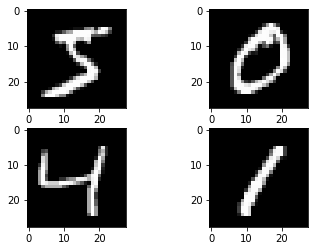

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Only MLP

In [3]:
# Baseline MLP for MNIST dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.2821 - accuracy: 0.9195 - val_loss: 0.1463 - val_accuracy: 0.9566
Epoch 2/10
 - 1s - loss: 0.1117 - accuracy: 0.9681 - val_loss: 0.1033 - val_accuracy: 0.9681
Epoch 3/10
 - 1s - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.0788 - val_accuracy: 0.9761
Epoch 4/10
 - 1s - loss: 0.0504 - accuracy: 0.9855 - val_loss: 0.0704 - val_accuracy: 0.9782
Epoch 5/10
 - 1s - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.0679 - val_accuracy: 0.9766
Epoch 6/10
 - 1s - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0588 - val_accuracy: 0.9810
Epoch 7/10
 - 1s - loss: 0.0210 - accuracy: 0.9944 - val_loss: 0.0660 - val_accuracy: 0.9793
Epoch 8/10
 - 1s - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.0609 - val_accuracy: 0.9805
Epoch 9/10
 - 1s - loss: 0.0113 - accuracy: 0.9974 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 10/10
 - 1s - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0612 - val_accuracy: 0.9815
Baseline Error: 1.8

# Simple Convolutional Neural Network for MNIST

In [4]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2397 - accuracy: 0.9316 - val_loss: 0.0763 - val_accuracy: 0.9779
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0715 - accuracy: 0.9789 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0407 - val_accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0359 - val_accuracy: 0.9884
Epoch 5/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0355 - val_accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch 7/10
60000/60000 [==============================] - 3s 51us/st

## 1. The first hidden layer is a convolutional layer called a Conv2D. The layer has 32 feature maps, with the size of 5 X 5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above.
## 2. Next we define a pooling layer that takes the maximum value called MaxPooling2D. It is configured with a pool size of 2 X 2.

## 3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
## 4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
## 5. Next a fully connected layer with 128 neurons and rectifier activation function is used.
## 6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

![nn](deep_learning_with_python.jpg)

# Larger Convolutional Neural Network for MNIST

In [6]:
# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3823 - accuracy: 0.8852 - val_loss: 0.0816 - val_accuracy: 0.9746
Epoch 2/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.0945 - accuracy: 0.9711 - val_loss: 0.0516 - val_accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0675 - accuracy: 0.9787 - val_loss: 0.0429 - val_accuracy: 0.9864
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0313 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 3s 58us/st

## 1. Convolutional layer with 30 feature maps of size 5 X 5.
## 2. Pooling layer taking the max over 2 X 2 patches.
## 3. Convolutional layer with 15 feature maps of size 3 X 3.
## 4. Pooling layer taking the max over 2 X 2 patches.
## 5. Dropout layer with a probability of 20%.
## 6. Flatten layer.
## 7. Fully connected layer with 128 neurons and rectier activation.
## 8. Fully connected layer with 50 neurons and rectier activation.

![nn](deep_learning_with_python2.jpg)